In [19]:
# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import WEEKDAYS
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path


# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

df = pd.read_csv(file).set_index("course_name")
df

,credits,day,start_time,duration,room,lecturer
course_name,,,,,,
63-501 - Atmospheric Dynamics,6,Tuesday,9:15,90,A,Nadjelka
63-503 - Radiation and Climate,6,Tuesday,12:15,90,B,Stephan
63-510 - Introduction to Atmospheric Physics,6,Wednesday,9:15,90,C,Juan
63-520 - Geophysical Wave Lab,6,Monday,11:15,90,D,Sergiey
63-580 - Advanced Practical Python Development,6,Monday,17:15,90,E,Aaron


In [16]:
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["duration"]

course_name
63-501 - Atmospheric Dynamics                    0 days 01:30:00
63-503 - Radiation and Climate                   0 days 01:30:00
63-510 - Introduction to Atmospheric Physics     0 days 01:30:00
63-520 - Geophysical Wave Lab                    0 days 01:30:00
63-580 - Advanced Practical Python Development   0 days 01:30:00
Name: duration, dtype: timedelta64[ns]

In [17]:
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["end_time"] = df["start_time"] + df["duration"]

df


,credits,day,start_time,duration,room,lecturer,start_minutes,end_time
course_name,,,,,,,,
63-501 - Atmospheric Dynamics,6,Tuesday,1900-01-01 09:15:00,0 days 01:30:00,A,Nadjelka,555,1900-01-01 10:45:00
63-503 - Radiation and Climate,6,Tuesday,1900-01-01 12:15:00,0 days 01:30:00,B,Stephan,735,1900-01-01 13:45:00
63-510 - Introduction to Atmospheric Physics,6,Wednesday,1900-01-01 09:15:00,0 days 01:30:00,C,Juan,555,1900-01-01 10:45:00
63-520 - Geophysical Wave Lab,6,Monday,1900-01-01 11:15:00,0 days 01:30:00,D,Sergiey,675,1900-01-01 12:45:00
63-580 - Advanced Practical Python Development,6,Monday,1900-01-01 17:15:00,0 days 01:30:00,E,Aaron,1035,1900-01-01 18:45:00


In [14]:
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["start_minutes"] = df["start_time"].dt.hour * 60 + df["start_time"].dt.minute
df["start_minutes"]

course_name
63-501 - Atmospheric Dynamics                      555
63-503 - Radiation and Climate                     735
63-510 - Introduction to Atmospheric Physics       555
63-520 - Geophysical Wave Lab                      675
63-580 - Advanced Practical Python Development    1035
Name: start_minutes, dtype: int32

In [21]:
Rectangle(0,1,1)

TypeError: 'int' object is not subscriptable

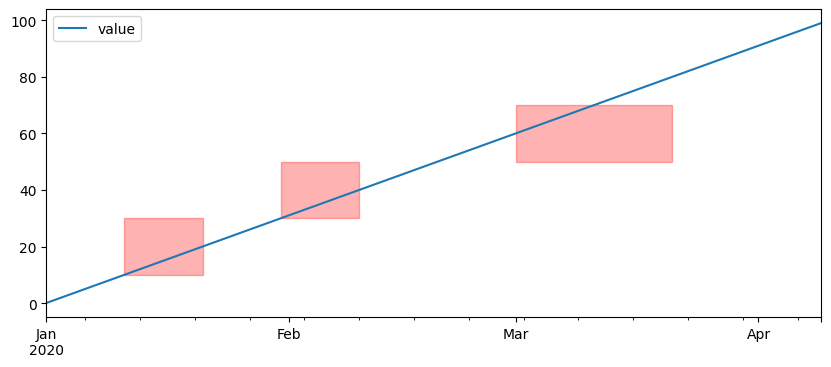

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Example data
dates = pd.date_range("2020-01-01", periods=100)
df = pd.DataFrame({"value": range(100)}, index=dates)

rect_df = pd.DataFrame({
    "x0": [dates[10], dates[30], dates[60]],
    "x1": [dates[20], dates[40], dates[80]],
    "y0": [10, 30, 50],
    "y1": [30, 50, 70]
})


ax = df.plot(figsize=(10, 4))

# Loop through each row and add a rectangle
for _, row in rect_df.iterrows():
    rect = Rectangle(
        (row.x0, row.y0),             # bottom-left corner
        row.x1 - row.x0,              # width (can be a Timedelta)
        row.y1 - row.y0,              # height
        alpha=0.3,
        color="red"
    )
    ax.add_patch(rect)

plt.show()


In [26]:
rect_df

,x0,x1,y0,y1
0,2020-01-11,2020-01-21,10,30
1,2020-01-31,2020-02-10,30,50
2,2020-03-01,2020-03-21,50,70


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

# Weekday order
WEEK_DAYS = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_to_x = {day: i for i, day in enumerate(WEEK_DAYS)}

# Load CSV
df = pd.read_csv(file).set_index("course_name")

# Parse times
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"]  = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

user="cp"

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    x = day_to_x[row["day"]]
    y = row["start_time"]
    height = row["duration"]
    width = 0.9   # slot width

    rect = Rectangle((x - width/2, y), width, height,
                     facecolor="skyblue", edgecolor="black", alpha=0.7)
    ax.add_patch(rect)

    ax.text(x, y + height/2, row.name, ha="center", va="center", fontsize=8)

# X-axis = days
ax.set_xticks(np.arange(len(WEEK_DAYS)))
ax.set_xticklabels(WEEK_DAYS)
ax.set_xlim(-0.5, len(WEEK_DAYS) - 0.5)
ax.xaxis.tick_top()

# Y-axis = time
ax.invert_yaxis()
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.yaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=30))

ax.set_ylabel("Time")
ax.set_title(f"{user}'s Study Timetable")

plt.tight_layout()
plt.show()


C:\Users\cpope\AppData\Local\Temp\ipykernel_25124\465300082.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 864x11812257 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1000x600 with 1 Axes>

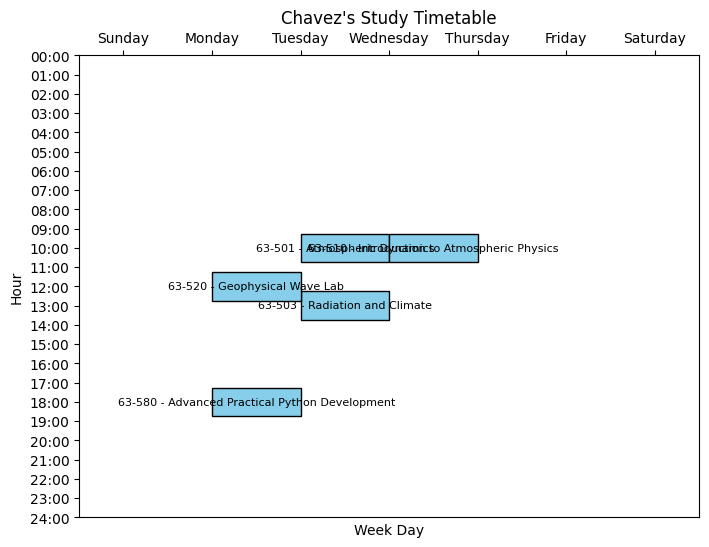

In [33]:
# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from soupsieve.css_match import DAYS_IN_WEEK

# Load File
# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

user = "Chavez"

df = pd.read_csv(file).set_index("course_name")

# Prepare the data
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

# Period to create timetable display
# period = Rectangle(
#     xy=(df["day"], df["start_time"]),
#     width=df["day"],
#     height=df["duration"]
# )


# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for subject, row in df.iterrows():
    x = WEEK_DAYS.index(row["day"])  # Convert day string to x-position
    y = row["start_time"].hour * 60 + row["start_time"].minute  # Minutes since midnight
    width = 1  # One day wide
    height = row["duration"].total_seconds() / 60  # Duration in minutes

    period = Rectangle(
        xy=(x, y),
        width=width,
        height=height,
        facecolor="skyblue",
        edgecolor="black"
    )
    ax.add_patch(period)

    # Optional: label the box
    ax.text(x + 0.5, y + height / 2, subject, ha="center", va="center", fontsize=8)
ax.set_title(f"{user}'s Study Timetable")
ax.xaxis.tick_top()
ax.set_xticks(ticks=np.arange(0, len(WEEK_DAYS)), labels=WEEK_DAYS)
ax.set_xlim(- 0.5, len(WEEK_DAYS) - 0.5)
ax.set_xticklabels(WEEK_DAYS)
ax.set_xlabel("Week Day")
ax.invert_yaxis()
ax.set_yticks(np.arange(0, 24*60+1, 60))
ax.set_yticklabels([f"{h:02d}:00" for h in range(25)])
ax.set_ylabel("Hour")
# ax.set_yticks(HOURS)

plt.show()

# define times and days
# start = dt.datetime(2025,1,1, 8,0)
# datetime_vec = [start + i * dt.timedelta(minutes=15) for i in range(0,49)]  # quarter hour steps
# time = [t.time() for t in datetime_vec]
# print(time)
# days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# print(df)



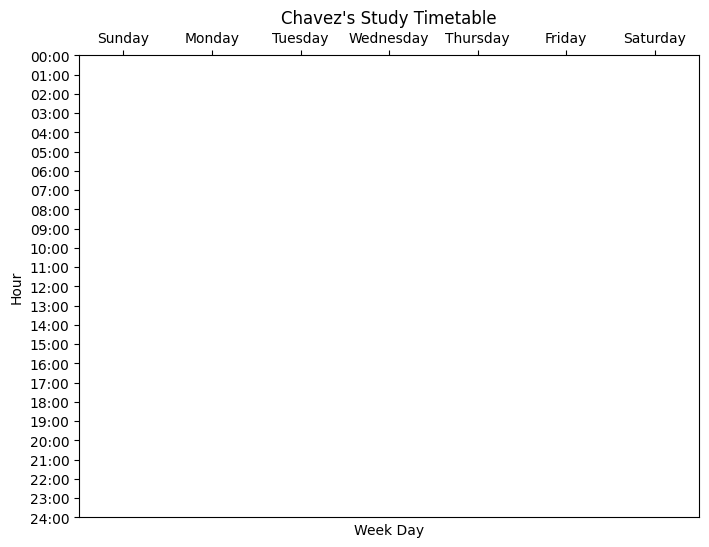

In [4]:
# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from soupsieve.css_match import DAYS_IN_WEEK

# Load File
# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

user = "Chavez"

df = pd.read_csv(file).set_index("course_name")

# Prepare the data
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

# Convert to mdates float values
df["y"] = mdates.date2num(df["start_time"])
df["height"] = mdates.date2num(df["end_time"]) - df["y"]

# Map day names to x positions
day_to_x = {day: i for i, day in enumerate(WEEK_DAYS)}
df["x"] = df["day"].map(day_to_x)



# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for _, row in df.iterrows():
    rect = Rectangle(
        (row["x"], row["y"]),
        width=1,
        height=row["height"],
        facecolor="skyblue",
        edgecolor="black"
    )
    ax.add_patch(rect)

ax.set_title(f"{user}'s Study Timetable")
ax.xaxis.tick_top()
ax.set_xticks(ticks=np.arange(0, len(WEEK_DAYS)), labels=WEEK_DAYS)
ax.set_xlim(- 0.5, len(WEEK_DAYS) - 0.5)
ax.set_xticklabels(WEEK_DAYS)
ax.set_xlabel("Week Day")
ax.invert_yaxis()
ax.set_yticks(np.arange(0, 24*60+1, 60))
ax.set_yticklabels([f"{h:02d}:00" for h in range(25)])
ax.set_ylabel("Hour")
# ax.set_yticks(HOURS)

plt.show()

# define times and days
# start = dt.datetime(2025,1,1, 8,0)
# datetime_vec = [start + i * dt.timedelta(minutes=15) for i in range(0,49)]  # quarter hour steps
# time = [t.time() for t in datetime_vec]
# print(time)
# days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# print(df)



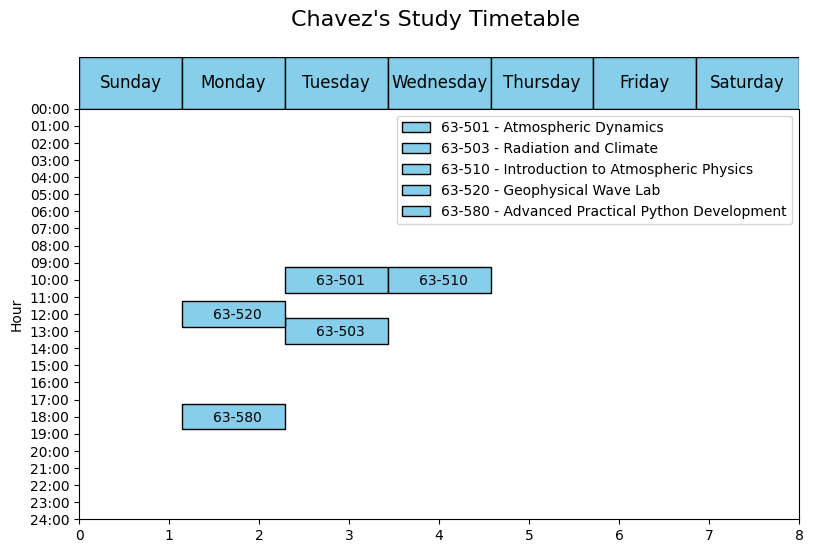

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

df = pd.read_csv(file).set_index("course_name")
df.index = df.index.astype("string")  # for slicing names later
df.index
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]


user = "Chavez"


WEEK_DAYS = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Plotting the layout

figsize_timetable = [8,6]
height_ratios = [1,8]
day_width = figsize_timetable[0] / len(WEEK_DAYS)
text_offset = [day_width /2, height_ratios[0] / 2]

fig = plt.figure(figsize = figsize_timetable)
fig.subplots_adjust(left=0.05, right=0.95)
gs = fig.add_gridspec(2, 1, height_ratios = height_ratios, hspace=0.0)



ax1 = fig.add_subplot(gs[0])
for i in range(len(WEEK_DAYS)):
    rec = Rectangle( (i * day_width, 0), day_width, 1, edgecolor="black", facecolor="skyblue" )
    ax1.add_patch(rec)

    ax1.text(i * day_width + text_offset[0], text_offset[1], f"{WEEK_DAYS[i]}", ha="center", va="center", fontsize=12)

ax1.set_xlim(0, figsize_timetable[0])
ax1.set_ylim(0,1)
ax1.axis("off")
ax1.set_title(f"{user}'s Study Timetable \n", fontsize = 16)

ax2 = fig.add_subplot(gs[1], sharex = ax1)
ax2.invert_yaxis()
ax2.set_yticks(np.arange(0, 24*60+1, 60))
ax2.set_yticklabels([f"{h:02d}:00" for h in range(25)])
ax2.set_ylabel("Hour")
#ax2.set_xticks([])

# plotting the courses:
# Convert to mdates float values that change dynamically with changing figsize
df["y"] = mdates.date2num(df["start_time"])
df["height"] = mdates.date2num(df["end_time"]) - df["y"]

# Map day names to x positions
day_to_x = {day: i * figsize_timetable[0]/len(WEEK_DAYS) for i, day in enumerate(WEEK_DAYS)}
df["x"] = df["day"].map(day_to_x)




for subject, row in df.iterrows():
    x = row["x"]
    y = row["start_time"].hour * 60 + row["start_time"].minute  # Minutes since midnight
    width = figsize_timetable[0] / len(WEEK_DAYS)  # One day wide
    height = row["duration"].total_seconds() / 60  # Duration in minutes

    period = Rectangle(
        xy=(x, y),
        width=width,
        height=height,
        facecolor="skyblue",
        edgecolor="black",
        label = subject
    )
    ax2.add_patch(period)
    ax2.text(x + width*0.3, y + height*0.7, subject[0:6])
ax2.legend()


In [108]:
earliest_time = datetime(year = 1900, month = 1, day = 1, hour = 0, minute = 0)
print(earliest_time)
latest_time = datetime(year = 1900, month = 1, day = 2, hour = 0, minute = 0)
print(latest_time)

1900-01-01 00:00:00
1900-01-02 00:00:00


In [25]:
# dynamic y-axis
earliest_time = datetime(year = 1900, month = 1, day = 2, hour = 0, minute = 0)
latest_time = datetime(year = 1900, month = 1, day = 1, hour = 0, minute = 0)
for subject, row in df.iterrows():
    starttime = row["start_time"]
    endtime = row["end_time"]
    if starttime < earliest_time:
        earliest_time = starttime
    if endtime > latest_time:
        latest_time = endtime
print(earliest_time, latest_time)

y_bounds = [(earliest_time - timedelta(hours = 2)).hour, (latest_time + timedelta(hours = 2)).hour]
print(y_bounds)

yticks = np.arange(y_bounds[0]*60, y_bounds[1]*60 +1, 60)
print(len(yticks))
print(yticks)

1900-01-01 09:15:00 1900-01-01 18:45:00
[7, 20]
14
[ 420  480  540  600  660  720  780  840  900  960 1020 1080 1140 1200]


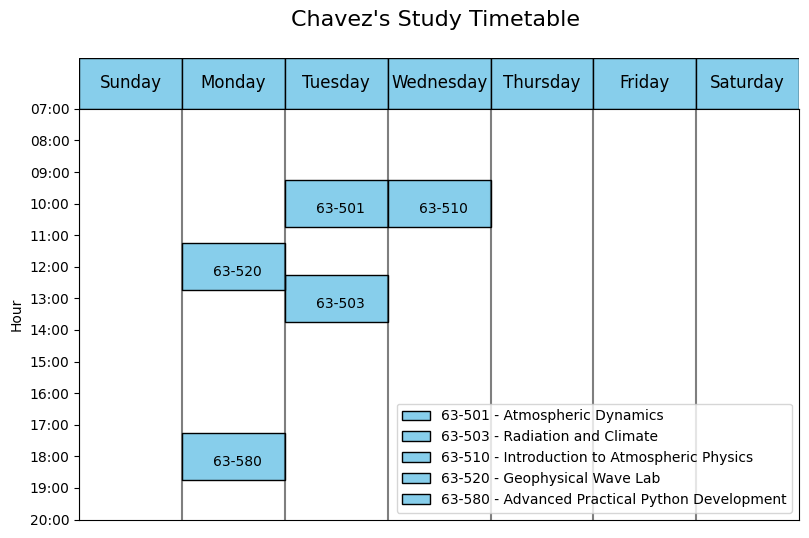

In [66]:

figsize_timetable = [8,6]
height_ratios = [1,8]
day_width = figsize_timetable[0] / len(WEEK_DAYS)
text_offset = [day_width /2, height_ratios[0] / 2]

fig = plt.figure(figsize = figsize_timetable)
fig.subplots_adjust(left=0.05, right=0.95)
gs = fig.add_gridspec(2, 1, height_ratios = height_ratios, hspace=0.0)



ax1 = fig.add_subplot(gs[0])
for i in range(len(WEEK_DAYS)):
    rec = Rectangle( (i * day_width, 0), day_width, 1, edgecolor="black", facecolor="skyblue" )
    ax1.add_patch(rec)

    ax1.text(i * day_width + text_offset[0], text_offset[1], f"{WEEK_DAYS[i]}", ha="center", va="center", fontsize=12)

ax1.set_xlim(0, figsize_timetable[0])
ax1.set_ylim(0,1)
ax1.axis("off")
ax1.set_title(f"{user}'s Study Timetable \n", fontsize = 16)

ax2 = fig.add_subplot(gs[1], sharex = ax1)
ax2.set_yticks(yticks)
ax2.set_ylim(yticks[0], yticks[-1])
ax2.invert_yaxis()
ax2.set_yticklabels([f"{int(h/60):02d}:00" for h in yticks])
ax2.set_ylabel("Hour")
ax2.set_xticks([])
daylines = [i * figsize_timetable[0] / len(WEEK_DAYS) for i,day in enumerate(WEEK_DAYS)]
for x in daylines:
    ax2.axvline(x, color = 'black', alpha = 0.5)

# plotting the courses:
# Convert to mdates float values
df["y"] = mdates.date2num(df["start_time"])
#df["height"] = mdates.date2num(df["end_time"]) - df["y"]

# Map day names to x positions
day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}
df["x"] = df["day"].map(day_to_x)




for subject, row in df.iterrows():
    x = row["x"]
    y = row["start_time"].hour * 60 + row["start_time"].minute  # Minutes since midnight
    width = figsize_timetable[0] / len(WEEK_DAYS)  # One day wide
    height = row["duration"].total_seconds() / 60  # Duration in minutes

    period = Rectangle(
        xy=(x, y),
        width=width,
        height=height,
        facecolor="skyblue",
        edgecolor="black",
        label = subject
    )
    ax2.add_patch(period)
    ax2.text(x + width*0.3, y + height*0.7, subject[0:6])
ax2.legend()


## implementing Classes

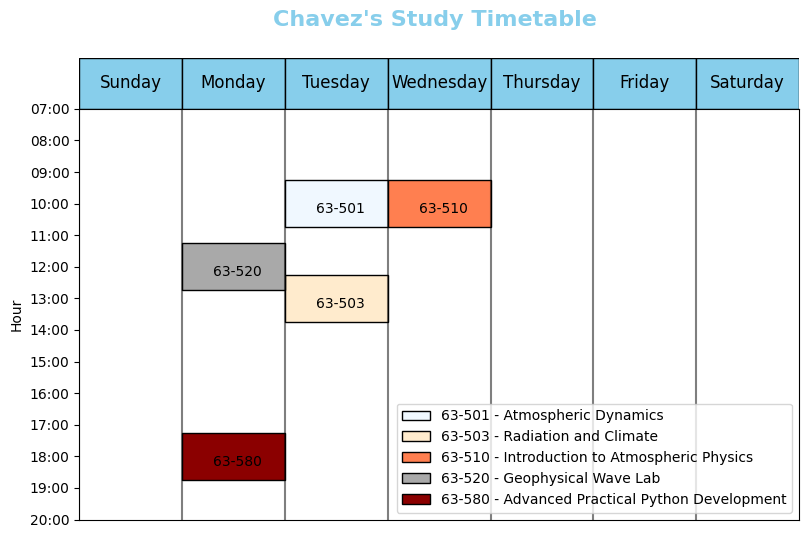

In [85]:
import matplotlib.colors as mcolors

class Course:
    def __init__(self, name, credits, day, starttime, duration, room, lecturer, color, day_to_x):
        self.name = name
        self.credits = credits
        self.day = day
        self.starttime = starttime
        self.duration = duration
        self.room = room
        self.lecturer = lecturer
        self.color = color

        self.endtime = starttime + duration
        self.y = starttime.hour * 60 + starttime.minute
        self.x = day_to_x[day]

courses = []
day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}
colors = list(mcolors.CSS4_COLORS)
for i, (subject, row) in enumerate(df.iterrows()):
    course = Course(subject, row["credits"], row["day"], row["start_time"], row["duration"], row["room"], row["lecturer"], colors[i+i*7], day_to_x)
    courses.append(course)

# plotting:
# prepare dynamic y-axis
earliest_time = datetime(year = 1900, month = 1, day = 2, hour = 0, minute = 0)
latest_time = datetime(year = 1900, month = 1, day = 1, hour = 0, minute = 0)

for subject in courses:
    if subject.start_time < earliest_time:
        earliest_time = subject.start_time
    if subject.endtime > latest_time:
        latest_time = subject.endtime

y_bounds = [(earliest_time - timedelta(hours = 2)).hour, (latest_time + timedelta(hours = 2)).hour]
yticks = np.arange(y_bounds[0]*60, y_bounds[1]*60 +1, 60)



figsize_timetable = [8,6]
height_ratios = [1,8]
day_width = figsize_timetable[0] / len(WEEK_DAYS)
text_offset = [day_width /2, height_ratios[0] / 2]

fig = plt.figure(figsize = figsize_timetable)
fig.subplots_adjust(left=0.05, right=0.95)
gs = fig.add_gridspec(2, 1, height_ratios = height_ratios, hspace=0.0)


# ax1 for days
ax1 = fig.add_subplot(gs[0])
for i in range(len(WEEK_DAYS)):
    rec = Rectangle( (i * day_width, 0), day_width, 1, edgecolor="black", facecolor=themecolor )
    ax1.add_patch(rec)

    ax1.text(i * day_width + text_offset[0], text_offset[1], f"{WEEK_DAYS[i]}", ha="center", va="center", fontsize=12)

ax1.set_xlim(0, figsize_timetable[0])
ax1.set_ylim(0,1)
ax1.axis("off")
ax1.set_title(f"{user}'s Study Timetable \n", fontsize = 16, color = themecolor, fontweight = "bold")

# ax2 for actual timetable
ax2 = fig.add_subplot(gs[1], sharex = ax1)
ax2.set_yticks(yticks)
ax2.set_ylim(yticks[0], yticks[-1])
ax2.invert_yaxis()
ax2.set_yticklabels([f"{int(h/60):02d}:00" for h in yticks])
ax2.set_ylabel("Hour")
ax2.set_xticks([])
daylines = [i * figsize_timetable[0] / len(WEEK_DAYS) for i,day in enumerate(WEEK_DAYS)]
for x in daylines:
    ax2.axvline(x, color = "black", alpha = 0.5)

# plotting the courses:
for subject in courses:
    width = figsize_timetable[0] / len(WEEK_DAYS)  # One day wide
    height = (subject.duration).total_seconds() / 60  # Duration in minutes

    period = Rectangle(
        xy=(subject.x, subject.y),
        width=width,
        height=height,
        facecolor=subject.color,
        edgecolor="black",
        label = subject.name
    )
    ax2.add_patch(period)
    ax2.text(subject.x + width*0.3, subject.y + height*0.7, subject.name[0:6])

ax2.legend()


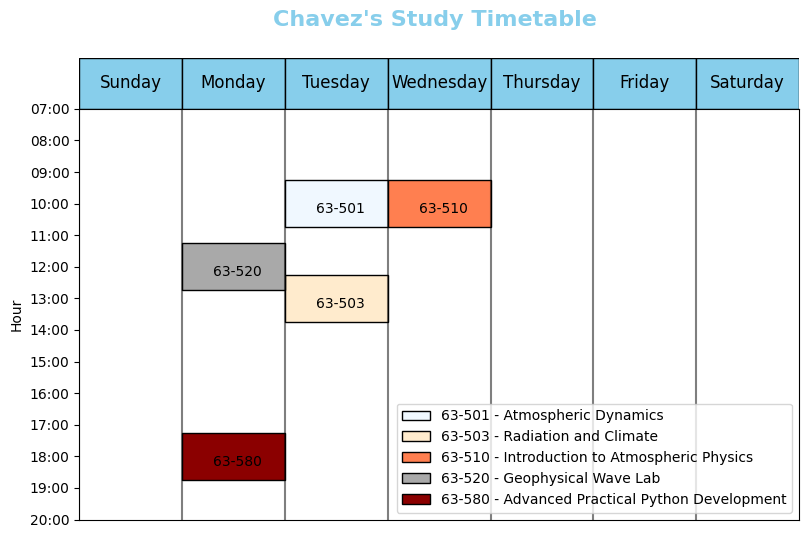

In [96]:
import matplotlib.colors as mcolors


class Course:
    def __init__(self, name, credits, day, starttime, duration, room, lecturer, color, figsize_timetable):
        self.name = name
        self.credits = credits
        self.day = day
        self.starttime = starttime
        self.duration = duration
        self.room = room
        self.lecturer = lecturer
        self.color = color

        self.endtime = starttime + duration
        self.y = starttime.hour * 60 + starttime.minute
        daylines = [i * figsize_timetable[0] / len(WEEK_DAYS) for i,day in enumerate(WEEK_DAYS)]
        day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}
        self.x = day_to_x[day]

themecolor = "skyblue"
courses = []
#day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}
colors = list(mcolors.CSS4_COLORS)
for i, (subject, row) in enumerate(df.iterrows()):
    course = Course(subject, row["credits"], row["day"], row["start_time"], row["duration"], row["room"],
                    row["lecturer"], colors[i + i * 7], [8,6])
    courses.append(course)

# plotting:
# prepare dynamic y-axis
earliest_time = datetime(year=1900, month=1, day=2, hour=0, minute=0)
latest_time = datetime(year=1900, month=1, day=1, hour=0, minute=0)

for subject in courses:
    if subject.start_time < earliest_time:
        earliest_time = subject.start_time
    if subject.endtime > latest_time:
        latest_time = subject.endtime

y_bounds = [(earliest_time - timedelta(hours=2)).hour, (latest_time + timedelta(hours=2)).hour]
yticks = np.arange(y_bounds[0] * 60, y_bounds[1] * 60 + 1, 60)

figsize_timetable = [8, 6]
height_ratios = [1, 8]
day_width = figsize_timetable[0] / len(WEEK_DAYS)
text_offset = [day_width / 2, height_ratios[0] / 2]

fig = plt.figure(figsize=figsize_timetable)
fig.subplots_adjust(left=0.05, right=0.95)
gs = fig.add_gridspec(2, 1, height_ratios=height_ratios, hspace=0.0)

# ax1 for days
ax1 = fig.add_subplot(gs[0])
for i in range(len(WEEK_DAYS)):
    rec = Rectangle((i * day_width, 0), day_width, 1, edgecolor="black", facecolor=themecolor)
    ax1.add_patch(rec)

    ax1.text(i * day_width + text_offset[0], text_offset[1], f"{WEEK_DAYS[i]}", ha="center", va="center", fontsize=12)

ax1.set_xlim(0, figsize_timetable[0])
ax1.set_ylim(0, 1)
ax1.axis("off")
ax1.set_title(f"{user}'s Study Timetable \n", fontsize=16, color=themecolor, fontweight="bold")

# ax2 for actual timetable
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.set_yticks(yticks)
ax2.set_ylim(yticks[0], yticks[-1])
ax2.invert_yaxis()
ax2.set_yticklabels([f"{int(h / 60):02d}:00" for h in yticks])
ax2.set_ylabel("Hour")
ax2.set_xticks([])
daylines = [i * figsize_timetable[0] / len(WEEK_DAYS) for i, day in enumerate(WEEK_DAYS)]
for x in daylines:
    ax2.axvline(x, color="black", alpha=0.5)

# plotting the courses:
for subject in courses:
    day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}

    width = figsize_timetable[0] / len(WEEK_DAYS)  # One day wide
    height = (subject.duration).total_seconds() / 60  # Duration in minutes

    period = Rectangle(
        xy=(subject.x, subject.y),
        width=width,
        height=height,
        facecolor=subject.color,
        edgecolor="black",
        label=subject.name
    )
    ax2.add_patch(period)
    ax2.text(subject.x + width * 0.3, subject.y + height * 0.7, subject.name[0:6])

ax2.legend()


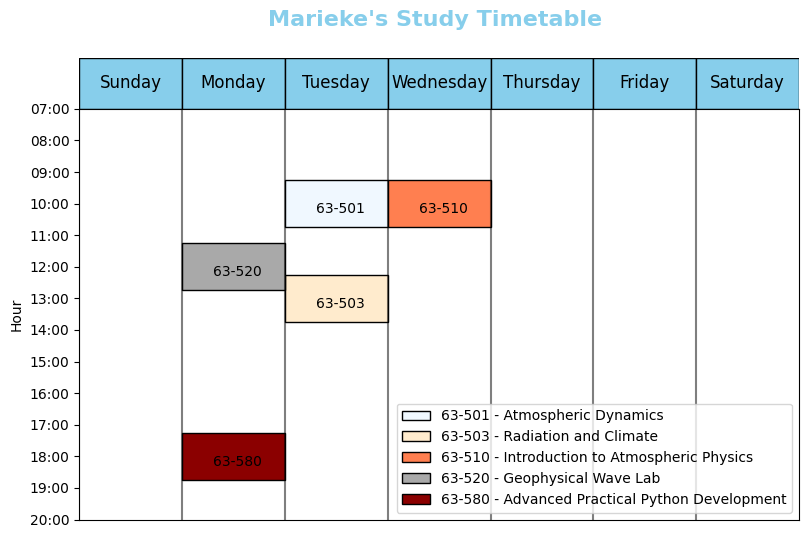

In [91]:
class Display():
    def __init__(self, courses):
        self.courses = courses

    def static(self, themecolor, figsize_timetable, user):
        # prepare dynamic y-axis
        earliest_time = datetime(year = 1900, month = 1, day = 2, hour = 0, minute = 0)
        latest_time = datetime(year = 1900, month = 1, day = 1, hour = 0, minute = 0)

        for subject in self.courses:
            if subject.start_time < earliest_time:
                earliest_time = subject.start_time
            if subject.endtime > latest_time:
                latest_time = subject.endtime

        y_bounds = [(earliest_time - timedelta(hours = 2)).hour, (latest_time + timedelta(hours = 2)).hour]
        yticks = np.arange(y_bounds[0]*60, y_bounds[1]*60 +1, 60)

        height_ratios = [1,8]
        day_width = figsize_timetable[0] / len(WEEK_DAYS)
        text_offset = [day_width /2, height_ratios[0] / 2]

        fig = plt.figure(figsize = figsize_timetable)
        fig.subplots_adjust(left=0.05, right=0.95)
        gs = fig.add_gridspec(2, 1, height_ratios = height_ratios, hspace=0.0)

        # ax1 for days
        ax1 = fig.add_subplot(gs[0])
        for i in range(len(WEEK_DAYS)):
            rec = Rectangle( (i * day_width, 0), day_width, 1, edgecolor="black", facecolor=themecolor)
            ax1.add_patch(rec)

            ax1.text(i * day_width + text_offset[0], text_offset[1], f"{WEEK_DAYS[i]}", ha="center", va="center", fontsize=12)

        ax1.set_xlim(0, figsize_timetable[0])
        ax1.set_ylim(0,1)
        ax1.axis("off")
        ax1.set_title(f"{user}'s Study Timetable \n", fontsize = 16, color = themecolor, fontweight = "bold")

        # ax2 for actual timetable
        ax2 = fig.add_subplot(gs[1], sharex = ax1)
        ax2.set_yticks(yticks)
        ax2.set_ylim(yticks[0], yticks[-1])
        ax2.invert_yaxis()
        ax2.set_yticklabels([f"{int(h/60):02d}:00" for h in yticks])
        ax2.set_ylabel("Hour")
        ax2.set_xticks([])
        daylines = [i * figsize_timetable[0] / len(WEEK_DAYS) for i,day in enumerate(WEEK_DAYS)]
        for x in daylines:
            ax2.axvline(x, color = "black", alpha = 0.5)

        # plotting the courses:
        for subject in self.courses:
            width = figsize_timetable[0] / len(WEEK_DAYS)  # One day wide
            height = (subject.duration).total_seconds() / 60  # Duration in minutes

            period = Rectangle(
                xy=(subject.x, subject.y),
                width=width,
                height=height,
                facecolor=subject.color,
                edgecolor="black",
                label = subject.name
            )
            ax2.add_patch(period)
            ax2.text(subject.x + width*0.3, subject.y + height*0.7, subject.name[0:6])

        ax2.legend()


courses = []
day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}
colors = list(mcolors.CSS4_COLORS)
for i, (subject, row) in enumerate(df.iterrows()):
    course = Course(subject, row["credits"], row["day"], row["start_time"], row["duration"], row["room"], row["lecturer"], colors[i+i*7], day_to_x)
    courses.append(course)

plot = Display(courses)
plot.static("skyblue", [8,6], "Marieke")


### dynamical plotting with plotly

In [1]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime, time, timedelta
import matplotlib.dates as mdates
from matplotlib.dates import WEEKDAYS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.colors as mcolors

In [2]:
# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"
WEEK_DAYS: list[str] = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
file = DATA_DIR / "planner_template - chavez_pope.csv"

df = pd.read_csv(file).set_index("course_name")
df.index = df.index.astype("string")  # for slicing names later
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]


class Course:
    def __init__(self,
        name: str,
        credits: int,
        day: str,
        start_time: time,
        duration: timedelta,
        room: str,
        lecturer: str,
        color: str,
        figsize_timetable
    ) -> None:

        self.name = name
        self.credits = credits
        self.day = day
        self.start_time = start_time
        self.duration = duration
        self.room = room
        self.lecturer = lecturer
        self.color = color

        self.endtime = start_time + duration
        self.y = start_time.hour * 60 + start_time.minute
        day_lines = [i * figsize_timetable[0] / len(WEEK_DAYS) for i, day in enumerate(WEEK_DAYS)]
        day_to_x = {day: day_lines[i] for i, day in enumerate(WEEK_DAYS)}
        self.x = day_to_x[day]


courses = []
#day_to_x = {day: daylines[i] for i, day in enumerate(WEEK_DAYS)}
colors = list(mcolors.CSS4_COLORS)
for i, (subject, row) in enumerate(df.iterrows()):
    course = Course(subject, row["credits"], row["day"], row["start_time"], row["duration"], row["room"],
                    row["lecturer"], colors[i + i * 7], [8,6])
    courses.append(course)

earliest_time = datetime(year = 1900, month = 1, day = 2, hour = 0, minute = 0)
latest_time = datetime(year = 1900, month = 1, day = 1, hour = 0, minute = 0)

for subject in courses:
    if subject.start_time < earliest_time:
        earliest_time = subject.start_time
    if subject.endtime > latest_time:
        latest_time = subject.endtime

y_bounds = [(earliest_time - timedelta(hours = 2)).hour, (latest_time + timedelta(hours = 2)).hour]
yticks = np.arange(y_bounds[0]*60, y_bounds[1]*60 +1, 60)

print(yticks)

[ 420  480  540  600  660  720  780  840  900  960 1020 1080 1140 1200]


In [6]:

height_ratios = [1, 8]
figsize_timetable = [8,6]

print(range(len(WEEK_DAYS)))
day_width = figsize_timetable[0] / len(WEEK_DAYS)
text_offset = [day_width /2, height_ratios[0] / 2]
themecolor = "skyblue"

fig = make_subplots(2,1, shared_xaxes=True, vertical_spacing=0, row_heights=height_ratios)
#fig.update_layout(autosize=False, width = figsize_timetable[0]*100, height = figsize_timetable[1]*100)

# create the days as a header in subplot 1:
for i in range(len(WEEK_DAYS)):
    fig.add_shape(type = "rect",
                  x0 = i*day_width*100,
                  x1 = i*day_width*100 + day_width*100,
                  y0 = 0,
                  y1 = 1,
                  xref = "x1",
                  yref = "y1",
                  row = 1,
                  col = 1,
                  fillcolor = themecolor,
                  #opacity = 0.5
                  )

    fig.add_annotation(
        x = (i*day_width + text_offset[0])*100,
        y = text_offset[1],
        text = f"{WEEK_DAYS[i]}",
        showarrow = False,
        col = 1,
        row = 1)
fig.update_yaxes(visible = False, col=1, row=1)
#fig.update_xaxes(visible = False, col=1, row=1)

# create timetable in subplot 2:


daylines = [i * figsize_timetable[0]*100 / len(WEEK_DAYS) for i,_ in enumerate(WEEK_DAYS)]
for x in daylines:
    fig.add_shape(type = "line",
                  x0 = x,
                  x1 = x,
                  y0 = yticks[0],
                  y1 = yticks[-1],
                  xref = "x2",
                  yref = "y2",
                  opacity = 0.5,
                  fillcolor = "black",
                  col=1,
                  row=2)

# plot the courses:
print(yticks)
for subject in courses:
    print(subject.y)
    print(subject.y + int((subject.duration).total_seconds() / 60))
    fig.add_shape(type = "rect",
                  x0 = subject.x *100,
                  x1 = subject.x *100 + day_width*100,
                  y1 = subject.y,
                  y0 = subject.y + int((subject.duration).total_seconds() / 60) ,
                  xref = "x2",
                  yref = "y2",
                  fillcolor = "red",
                  col=1,
                  row=2)

fig.update_yaxes(title_text = "Hour", range = [max(yticks), min(yticks)],
                 tickvals = yticks, ticktext = [f"{int(h/60):02d}:00" for h in yticks], row=2, col=1)
fig.update_xaxes(visible = False, col=1, row=2)

# without the following code line nothing will show up and I don't understand why...
fig.add_trace(go.Scatter(x = [100,200,300],y = [yticks[5], yticks[2], yticks[4]]), col=1, row=2)

fig.show()



range(0, 7)
[ 420  480  540  600  660  720  780  840  900  960 1020 1080 1140 1200]
555
645
735
825
555
645
675
765
1035
1125
